### Student Information
Name: 陳妘儒

Student ID: 113065541

GitHub ID: rheayunru

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [443]:
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
%matplotlib inline
import helpers.data_mining_helpers as dmh

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns=['text'])
X['category'] = twenty_train.target
X['category_name'] = X['category'].apply(lambda t: dmh.format_labels(t, twenty_train))

## **Part1- Take home exercises**

### **>>> Exercise 2 (take home):** 

In [444]:
X.loc[X['category_name'] == 'alt.atheism']

text  category category_name
12    From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau) Subject: Re: A visit from the Jehovah's Witnesses Organization: Technical University Braunschweig, Germany Lines: 114  In article <1993Apr5.091139.823@batman.bmd.trw.com> jbrown@batman.bmd.trw.com writes:   >> Didn't you say Lucifer was created with a perfect nature? > >Yes. >   Define perfect then.     >> I think you >> are playing the usual game here, make sweeping statements like omni-, >> holy, or perfect, and don't note that they mean exactly what they say. >> And that says that you must not use this terms when it leads to >> contradictions. > >I'm not trying to play games here.  But I understand how it might seem >that way especially when one is coming from a completely different point >of view such as atheism. >   Take your foot out of your mouth, I wondered about that already when I was a Catholic Christian. The fact that the contradiction is unresolvable is one of the reasons why I am an atheist.   Believe me, I believed similar sentences for a long time. But that shows the power of religion and not anything about its claims.     >>>Now God could have prevented Lucifer's fall by taking away his ability >>>to choose between moral alternatives (worship God or worship himself), >>>but that would mean that God was in error to have make Lucifer or any >>>being with free will in the first place. >> >> Exactly. God allows evil, an evil if there ever was one. >> > >Now that's an opinion, or at best a premise.  But from my point of view, >it is not a premise which is necessary true, specifically, that it is >an evil to allow evil to occur. >   It follows from a definition of evil as ordinarily used. Letting evil happen or allowing evil to take place, in this place even causing evil, is another evil.     >> But could you give a definition of free will? Especially in the >> presence of an omniscient being? >> >"Will" is "self-determination".  In other words, God created conscious >beings who have the ability to choose between moral choices independently >of God.  All "will", therefore, is "free will". >   The omniscient attribute of god will know what the creatures will do even before the omnipotent has created them. There is no choice left. All is known, the course of events is fixed.   Not even for the omniscient itself, to extend an argument by James Tims.     >>>If God is omniscient, then >>>clearly, creating beings with free moral choice is a greater good than >>>the emergence of ungodliness (evil/sin) since He created them knowing >>>the outcome in advance. >> >> Why is it the greater good to allow evil with the knowledge that it >> will happen? Why not make a unipolar system with the possibility of >> doing good or not doing good, but that does not necessarily imply >> doing evil. It is logically possible, but your god has not done it. > >I do not know that such is logically possible.  If God restrains a >free being's choice to choose to do evil and simply do "not good", >then can it be said that the being truly has a free moral choice? >And if "good" is defined as loving and obeying God, and avoiding >those behaviors which God prohibits, then how can you say that one >who is "not good" is not evil as well?  Like I said, I am not sure >that doing "not good" without doing evil is logically possible.   And when I am not omnipotent, how can I have free will? You have said something about choices and the scenario gives them. Therefore we have what you define as free will.   Imagine the following. I can do good to other beings, but I cannot harm them. Easily implemented by making everyone appreciate being the object of good deeds, but don't make them long for them, so they can not feel the absence of good as evil.   But whose case am I arguing? It is conceivable, so the omnipotent can do it. Or it would not be omnipotent. If you want logically consistent as well, you have to give up the pet idea of an omnipotent first.   (Deletion) > >Perha

In [445]:
X.iloc[:5, 0: 3]

,text,category,category_name
0,"From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14 Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format. We would also like to do the same, converting to HPGL (HP plotter) files. Please email any response. Is this the correct group? Thanks in advance. Michael. -- Michael Collier (Programmer) The Computer Unit, Email: M.P.Collier@uk.ac.city The City University, Tel: 071 477-8000 x3769 London, Fax: 071 477-8565 EC1V 0HB.",1,comp.graphics
1,"From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28 \tHi, \tI have a problem, I hope some of the 'gurus' can help me solve. \tBackground of the problem: \tI have a rectangular mesh in the uv domain, i.e the mesh is a \tmapping of a 3d Bezier patch into 2d. The area in this domain \twhich is inside a trimming loop had to be rendered. The trimming \tloop is a set of 2d Bezier curve segments. \tFor the sake of notation: the mesh is made up of cells. \tMy problem is this : \tThe trimming area has to be split up into individual smaller \tcells bounded by the trimming curve segments. If a cell \tis wholly inside the area...then it is output as a whole , \telse it is trivially rejected. \tDoes any body know how thiss can be done, or is there any algo. \tsomewhere for doing this. \tAny help would be appreciated. \tThanks, \tAni. -- To get irritated is human, to stay cool, divine.",1,comp.graphics
2,"From: djohnson@cs.ucsd.edu (Darin Johnson) Subject: Re: harrassed at work, could use some prayers Organization: =CSE Dept., U.C. San Diego Lines: 63 (Well, I'll email also, but this may apply to other people, so I'll post also.) >I've been working at this company for eight years in various >engineering jobs. I'm female. Yesterday I counted and realized that >on seven different occasions I've been sexually harrassed at this >company. >I dreaded coming back to work today. What if my boss comes in to ask >me some kind of question... Your boss should be the person bring these problems to. If he/she does not seem to take any action, keep going up higher and higher. Sexual harrassment does not need to be tolerated, and it can be an enormous emotional support to discuss this with someone and know that they are trying to do something about it. If you feel you can not discuss this with your boss, perhaps your company has a personnel department that can work for you while preserving your privacy. Most companies will want to deal with this problem because constant anxiety does seriously affect how effectively employees do their jobs. It is unclear from your letter if you have done this or not. It is not inconceivable that management remains ignorant of employee problems/strife even after eight years (it's a miracle if they do notice). Perhaps your manager did not bring to the attention of higher ups? If the company indeed does seem to want to ignore the entire problem, there may be a state agency willing to fight with you. (check with a lawyer, a women's resource center, etc to find out) You may also want to discuss this with your paster, priest, husband, etc. That is, someone you know will not be judgemental and that is supportive, comforting, etc. This will bring a lot of healing. >So I returned at 11:25, only to find that ever single >person had already left for lunch. They left at 11:15 or so. No one >could be bothered to call me at the other building, even though my >number was posted. This happens to a lot of people. Honest. I believe it may seem to be due to gross insensitivity because of the feelings you are going through. People in offices tend to be more insensitive while working than they normally are (maybe it's the hustle or stress or...) I've had this happen to me a lot, often b

### **>>> Exercise 5 (take home):** 

In [446]:
NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [447]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [448]:
# Answer here

# .isnull() works only for actual missing data, such as np.nan and None. 
# 'NAN', 'NaN', 'None',and '' are not null, they are values instesd of missing values
# We can convert specific string values to actual missing values using .replace() before applying .isnull()

In [450]:
NA_df.replace(['NAN', 'NaN', 'None', ''], np.nan, inplace=True)

NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### **>>> Exercise 6 (take home):** 

In [451]:
X[:10]

,text,category,category_name
0,"From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14 Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format. We would also like to do the same, converting to HPGL (HP plotter) files. Please email any response. Is this the correct group? Thanks in advance. Michael. -- Michael Collier (Programmer) The Computer Unit, Email: M.P.Collier@uk.ac.city The City University, Tel: 071 477-8000 x3769 London, Fax: 071 477-8565 EC1V 0HB.",1,comp.graphics
1,"From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28 \tHi, \tI have a problem, I hope some of the 'gurus' can help me solve. \tBackground of the problem: \tI have a rectangular mesh in the uv domain, i.e the mesh is a \tmapping of a 3d Bezier patch into 2d. The area in this domain \twhich is inside a trimming loop had to be rendered. The trimming \tloop is a set of 2d Bezier curve segments. \tFor the sake of notation: the mesh is made up of cells. \tMy problem is this : \tThe trimming area has to be split up into individual smaller \tcells bounded by the trimming curve segments. If a cell \tis wholly inside the area...then it is output as a whole , \telse it is trivially rejected. \tDoes any body know how thiss can be done, or is there any algo. \tsomewhere for doing this. \tAny help would be appreciated. \tThanks, \tAni. -- To get irritated is human, to stay cool, divine.",1,comp.graphics
2,"From: djohnson@cs.ucsd.edu (Darin Johnson) Subject: Re: harrassed at work, could use some prayers Organization: =CSE Dept., U.C. San Diego Lines: 63 (Well, I'll email also, but this may apply to other people, so I'll post also.) >I've been working at this company for eight years in various >engineering jobs. I'm female. Yesterday I counted and realized that >on seven different occasions I've been sexually harrassed at this >company. >I dreaded coming back to work today. What if my boss comes in to ask >me some kind of question... Your boss should be the person bring these problems to. If he/she does not seem to take any action, keep going up higher and higher. Sexual harrassment does not need to be tolerated, and it can be an enormous emotional support to discuss this with someone and know that they are trying to do something about it. If you feel you can not discuss this with your boss, perhaps your company has a personnel department that can work for you while preserving your privacy. Most companies will want to deal with this problem because constant anxiety does seriously affect how effectively employees do their jobs. It is unclear from your letter if you have done this or not. It is not inconceivable that management remains ignorant of employee problems/strife even after eight years (it's a miracle if they do notice). Perhaps your manager did not bring to the attention of higher ups? If the company indeed does seem to want to ignore the entire problem, there may be a state agency willing to fight with you. (check with a lawyer, a women's resource center, etc to find out) You may also want to discuss this with your paster, priest, husband, etc. That is, someone you know will not be judgemental and that is supportive, comforting, etc. This will bring a lot of healing. >So I returned at 11:25, only to find that ever single >person had already left for lunch. They left at 11:15 or so. No one >could be bothered to call me at the other building, even though my >number was posted. This happens to a lot of people. Honest. I believe it may seem to be due to gross insensitivity because of the feelings you are going through. People in offices tend to be more insensitive while working than they normally are (maybe it's the hustle or stress or...) I've had this happen to me a lot, often b

In [452]:
X_sample = X.sample(n=1000) #random state
X_sample[:10]

,text,category,category_name
865,"From: sandy@nmr1.pt.cyanamid.COM (Sandy Silverman) Subject: Re: Barbecued foods and health risk In-Reply-To: markmc@halcyon.com's message of 19 Apr 1993 01:07:22 -0700 Nntp-Posting-Host: nmr1.pt.cyanamid.com Organization: American Cyanamid Company \t<1qtmjq$ahd@nwfocus.wa.com> Lines: 11 From my reading of the popular, and scientific, literature, I think that the benzopyrene-from-burned-fat problem is probably real but very small compared to other kinds of risks. (This type of problem also occurs with stove-top pan grilling.) One possible remedy I have read about is to take some vitamin C with your meal of barbecue (or bacon, e.g.). This MAY make sense because vit. C is an antioxidant which could counteract the adverse affect of some of the chemicals in question. Bon Apetit! -- Sanford Silverman >Opinions expressed here are my own< American Cyanamid sandy@pt.cyanamid.com, silvermans@pt.cyanamid.com ""Yeast is Best""",2,sci.med
1993,"From: Petch@gvg47.gvg.tek.com (Chuck Petch) Subject: Daily Verse Organization: Grass Valley Group, Grass Valley, CA Lines: 4 Be devoted to one another in brotherly love. Honor one another above yourselves. Romans 12:10",3,soc.religion.christian
1602,"Subject: Cornerstone DualPage driver wanted From: tkelder@ebc.ee (Tonis Kelder) Nntp-Posting-Host: kask.ebc.ee X-Newsreader: TIN [version 1.1 PL8]Lines: 12 Lines: 12 I am looking for a WINDOW 3.1 driver for Cornerstone DualPage (Cornerstone Technology, Inc) video card. Does anybody know, that has these? Is there one? Thanks for any info, To~nis -- To~nis Kelder Estonian Biocentre (tkelder@kask.ebc.ee)",1,comp.graphics
1480,"From: hugo@hydra.unm.edu (patrice cummings) Subject: polygon orientation in DXF? Organization: University of New Mexico, Albuquerque Lines: 21 NNTP-Posting-Host: hydra.unm.edu Hi. I'm writing a program to convert .dxf files to a database format used by a 3D graphics program I've written. My program stores the points of a polygon in CCW order. I've used 3D Concepts a little and it seems that the points are stored in the order they are drawn. Does the DXF format have a way of indicating which order the points are stored in, CW or CCW? Its easy enough to convert, but if I don't know which way they are stored, I dont know which direction the polygon should be visible from. If DXF doesn't handle this, can anyone recommend a workaround? The best I can think of is to create two polygons for each one in the DXF file, one stored CW and the other CCW. But that doubles the number of polygons and decreases speed... Thanks in advance for any help, Patrice hugo@hydra.unm.edu",1,comp.graphics
2085,"From: dougb@comm.mot.com (Doug Bank) Subject: Re: Is MSG sensitivity superstition? Reply-To: dougb@ecs.comm.mot.com Organization: Motorola Land Mobile Products Sector Nntp-Posting-Host: 145.1.146.35 Lines: 39 In article <1993Apr14.122647.16364@tms390.micro.ti.com>, david@tms390.micro.ti.com (David Thomas) writes: |> cnavarro@cymbal.calpoly.edu (CLAIRE) writes: |> >>Is there such a thing as MSG (monosodium glutamate) sensitivity? |> >>I saw in the NY Times Sunday that scientists have testified before |> >>an FDA advisory panel that complaints about MSG sensitivity are |> >>superstition. Anybody here have experience to the contrary? |> >> |> >>I'm old enough to remember that the issue has come up at least |> >>a couple of times since the 1960s. Then it was called the |> >>""Chinese restaurant syndrome"" because Chinese cuisine has |> >>always used it. |> So far, I've seen about a dozen posts of anecdotal evidence, but |> no facts. I suspect there is a strong psychological effect at |> work here. Does anyone have results from a scientific study |> using double-blind trials? Here is another anecdotal story. I am a picky eater and never wanted to try chinese food, however, I finally tried some in order to please a girl I was seeing at the time. I had never heard of Chinese restaurant syndrome. A group of us went to the restau

In [453]:
# Answer here

#The differences between X and X_sample dataframes:

#1. Row Order: The rows in X_sample are in a different order compared to X. 
#   This is because X_sample was created using X.sample(n=1000), which takes a random sample of 1000 rows from X. 
#   The result is a reshuffled or randomized order of rows.

#2. Row Indexes: The index values in X_sample no longer start from 0 and follow a sequential order as they do in X. 
#   Instead, they reflect the original row indices from X.

#3. Number of Rows: The original X dataframe likely has more than 1000 rows since X.sample(n=1000) was able to sample a subset of this size. 
#   X_sample, therefore, only contains a portion of the rows from X.

### **>>> Exercise 8 (take home):** 

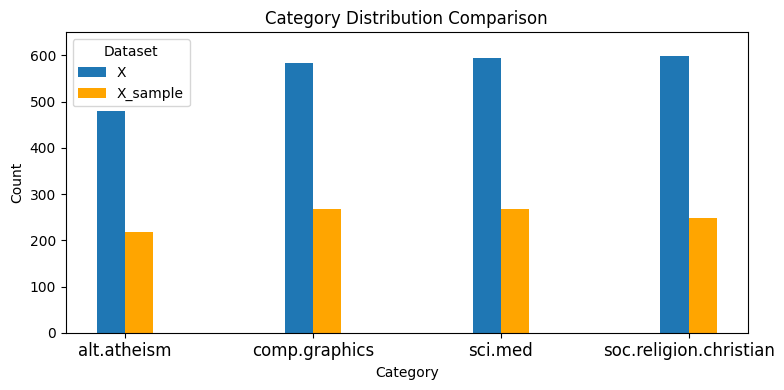

In [454]:
import matplotlib.pyplot as plt

# Retrieve data
X_sample = X.sample(n=1000)
X_sample_counts = X_sample.category_name.value_counts()
X_counts = X.category_name.value_counts()

# Ensure both datasets have the same category indices
categories = X_sample_counts.index.union(X_counts.index)  # Merge categories from both datasets

X_sample_counts = X_sample_counts.reindex(categories, fill_value=0)
X_counts = X_counts.reindex(categories, fill_value=0)

# Set bar width and positions
bar_width = 0.15
index = np.arange(len(categories))  # Create x-axis indices

# Create the plot
plt.figure(figsize=(8, 4))
plt.bar(index, X_counts, bar_width, label='X')  
plt.bar(index + bar_width, X_sample_counts, bar_width, label='X_sample', color='orange') 

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution Comparison')
plt.xticks(index + bar_width / 2, categories, rotation=0, fontsize=12)  # Set x-axis tick positions and labels
plt.ylim(0, 650)
plt.legend(title='Dataset')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### **>>> Exercise 10 (take home):** 

In [455]:
import seaborn as sns

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

# Get the list of vocabulary terms, where each term corresponds to a column in the term-frequency matrix
vocab = count_vect.get_feature_names_out()

# Find all non-zero indices in the fifth row (index 4) of the term-frequency matrix
non_zero_indices = np.nonzero(X_counts.toarray()[4])[0]

# Access the second non-zero index in the fifth row
second_one = non_zero_indices[1]
words = vocab[second_one] 

print("The second 1 of the fifth record represents:", words)

The second 1 of the fifth record represents: 01


### **>>> Exercise 11 (take home):** 

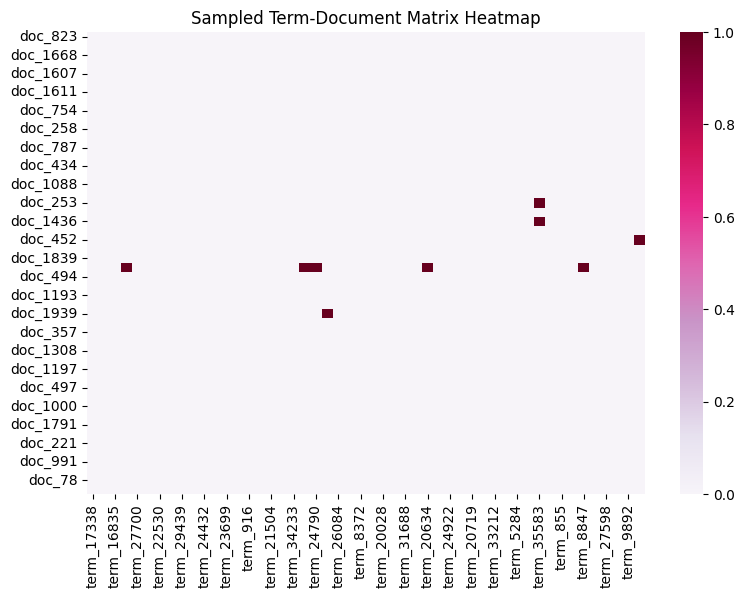

In [456]:
import seaborn as sns

num_samples = 50
sample_rows = np.random.choice(X_counts.shape[0], num_samples, replace=False)
sample_cols = np.random.choice(X_counts.shape[1], num_samples, replace=False)

# Extract the corresponding submatrix from the matrix
plot_z = X_counts[sample_rows, :][:, sample_cols].toarray()

# Generate labels for the selected rows and columns
plot_x = ["term_" + str(i) for i in sample_cols]
plot_y = ["doc_" + str(i) for i in sample_rows]

# Create DataFrame
df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# Plot the heatmap
plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=False)
plt.title("Sampled Term-Document Matrix Heatmap")
plt.show()

### **>>> Exercise 12 (take home):** 

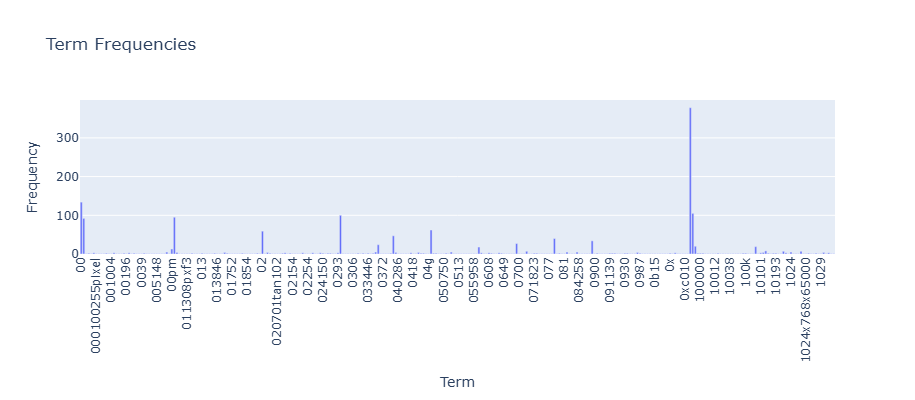

In [457]:
import plotly.express as px

term_frequencies = []
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

# Create a DataFrame to store terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:300],
    'Frequency': term_frequencies[:300]
})

# Create a bar chart using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title='Term Frequencies')

# Set x-axis label rotation
fig.update_layout(xaxis_tickangle=-90, width=1200, height=400)

# Display the interactive chart
fig.show()


### **>>> Exercise 13 (take home):** 

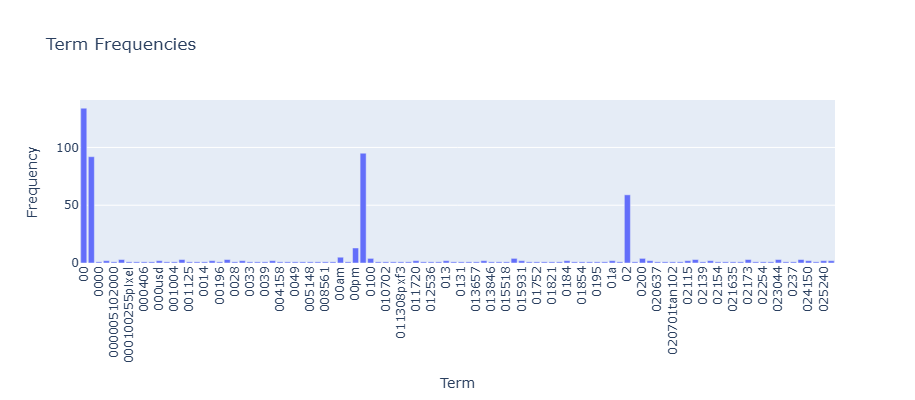

In [458]:
import plotly.express as px

# Create a DataFrame to store terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:100],
    'Frequency': term_frequencies[:100]
})

# Create a bar chart using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title='Term Frequencies')

# Set x-axis label rotation
fig.update_layout(xaxis_tickangle=-90, width=1200, height=400)

# Display the interactive chart
fig.show()

### **>>> Exercise 14 (take home):** 

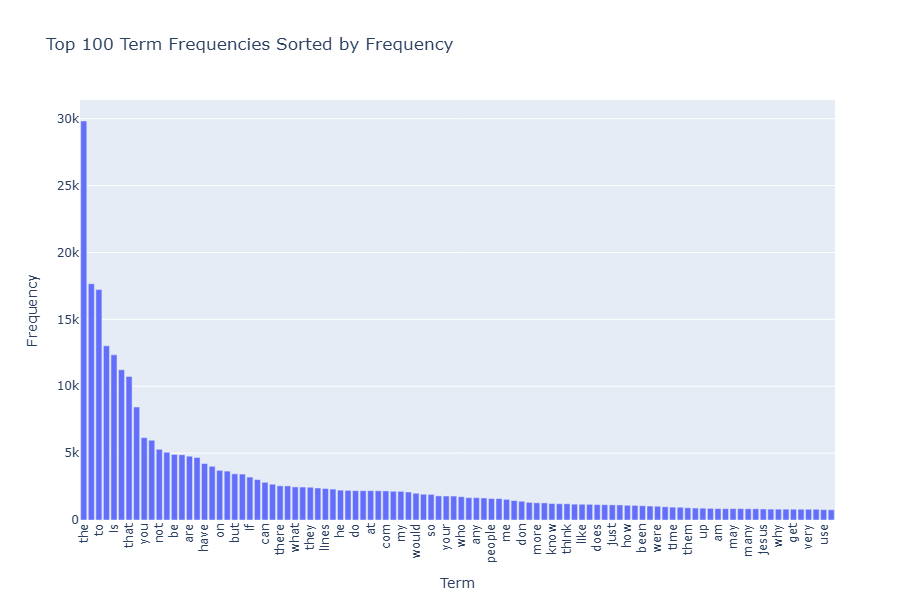

In [459]:
import plotly.express as px

# Create a DataFrame containing terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# Sort terms by frequency
df_sorted = df.sort_values(by='Frequency', ascending=False)

# Select the top 100 terms to display
df_top = df_sorted.head(100)

# Plot a bar chart using Plotly
fig = px.bar(df_top, x='Term', y='Frequency', title='Top 100 Term Frequencies Sorted by Frequency')

# Set x-axis label rotation
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Display the interactive chart
fig.show()

### **>>> Exercise 15 (take home):** 

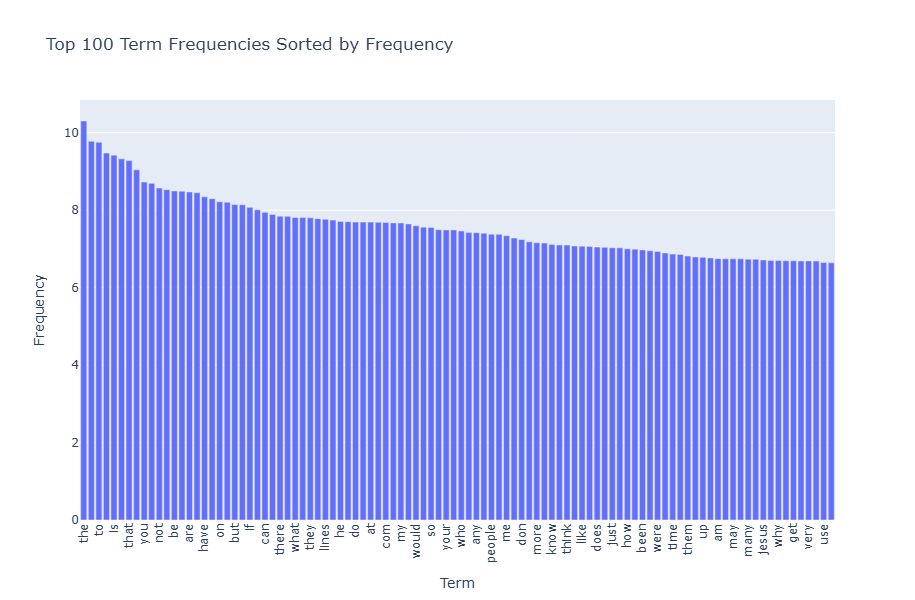

In [460]:
import plotly.express as px
import math

# Create a DataFrame containing terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# Calculate the logarithm of each term frequency
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Create a DataFrame with terms and their log-transformed frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies_log
})

# Sort terms by frequency
df_sorted = df.sort_values(by='Frequency', ascending=False)

# Select the top 100 terms to display
df_top = df_sorted.head(100)

# Plot a bar chart using Plotly
fig = px.bar(df_top, x='Term', y='Frequency', title='Top 100 Term Frequencies Sorted by Frequency')

# Set x-axis label rotation
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Display the interactive chart
fig.show()

### **>>> Exercise 16 (take home):** 

The results:

Category comp.graphics

000	000005102000	000100255pixel	0007	000usd	0010580b	002	0094	00index	00pm

584 rows × 8391 columns

soc.religion.christian

000	0001	01580	02173	0349	0358	04	0510	0511	06

599 rows × 9002 columns

sci.med

0000001200	001642	003258u19250	004021809	00am	01	013	0138	02	02115

594 rows × 11221 columns

alt.atheism

00	0100	015931	020504	023044	024150	025924	033446	04	041343	

480 rows × 8787 columns

The similarities:

Numeric and Alphanumeric Words, Zeros, and High Representation of Stop Words

The differences:

Category-Specific Tokens, Number of Columns (Distinct Terms), and Nature of Terms

### **>>> Exercise 17 (take home):** 

In [466]:
from PAMI.frequentPattern.topk import FAE as alg
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfp

for k in [500, 1000, 1500]:
    # Initialize the FAE algorithm object with input file and k value
    obj = alg.FAE(iFile='td_freq_db_comp_graphics.csv', k=k)
    # Execute the mining process to find top-k frequent patterns
    obj.mine()
    # Retrieve the mined patterns
    topKFrequentPatterns = obj.getPatterns()
    print('Total No of patterns: ' + str(len(topKFrequentPatterns)))
    print('Runtime: ' + str(obj.getRuntime()))
    obj.save(f'fae_{k}_patterns.txt')

for minSup in [3, 6, 9]:
     # Initialize the MaxFPGrowth object with input file and minSup value
    obj2 = maxfp.MaxFPGrowth("td_freq_db_comp_graphics.csv", minSup=minSup)
    # Execute the mining process to find maximal frequent patterns
    obj2.mine()
    # Retrieve the mined patterns
    patterns_df = obj2.getPatterns()
    print('Total No of patterns: ' + str(len(patterns_df)))
    print('Runtime: ' + str(obj2.getRuntime()))
    obj2.save(f'maxfp_{minSup}_patterns.txt')

 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 500
Runtime: 0.9024219512939453
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1000
Runtime: 1.820784091949463
 TopK frequent patterns were successfully generated using FAE algorithm.
Total No of patterns: 1500
Runtime: 4.224302768707275
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 6872
Runtime: 21.93883514404297
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 1340
Runtime: 0.32414770126342773
Maximal Frequent patterns were generated successfully using MaxFp-Growth algorithm 
Total No of patterns: 660
Runtime: 0.12572741508483887


### **>>> Exercise 18 (take home):** 

In [467]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

col = ['coral', 'blue', 'black', 'orange']
categories = X['category_name'].unique()

# Applying PCA, t-SNE, and UMAP to reduce data to 3D
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

# Viewing angles
angles = [(20, 40), (40, 60), (60, 80)]

# Define a function to create 3D scatter plots
def plot_3d_scatter(ax, X_reduced, title):
    fig = plt.figure(figsize=(30, 10))  
    for i, angle in enumerate(angles):
        ax = fig.add_subplot(1, 3, i+1, projection='3d')
        for c, category in zip(col, categories):
            xs = X_reduced[X['category_name'] == category].T[0]
            ys = X_reduced[X['category_name'] == category].T[1]
            zs = X_reduced[X['category_name'] == category].T[2] 
            ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
            
            ax.view_init(elev=angle[0], azim=angle[1])
            ax.set_title(f'{title} View {i+1}')
            ax.set_xlabel('X')
            ax.set_ylabel('Y')
            ax.set_zlabel('Z')
            ax.legend(loc='upper right')
    

# Create 3D scatter plots for PCA, t-SNE, and UMAP
#ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_aug, 'PCA')

#ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_aug, 't-SNE')

#ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_aug, 'UMAP')

plt.show()

AttributeError: 'csr_matrix' object has no attribute 'values'

### **>>> Exercise 19 (take home):** 

In [468]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]
#it dosen't work,the list show the[0000].I think the category_name can't indicate the size of the number of categories. 

,text,category,category_name,bin_category
0,"From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14 Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format. We would also like to do the same, converting to HPGL (HP plotter) files. Please email any response. Is this the correct group? Thanks in advance. Michael. -- Michael Collier (Programmer) The Computer Unit, Email: M.P.Collier@uk.ac.city The City University, Tel: 071 477-8000 x3769 London, Fax: 071 477-8565 EC1V 0HB.",1,comp.graphics,"[0, 0, 0, 0]"
1,"From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28 \tHi, \tI have a problem, I hope some of the 'gurus' can help me solve. \tBackground of the problem: \tI have a rectangular mesh in the uv domain, i.e the mesh is a \tmapping of a 3d Bezier patch into 2d. The area in this domain \twhich is inside a trimming loop had to be rendered. The trimming \tloop is a set of 2d Bezier curve segments. \tFor the sake of notation: the mesh is made up of cells. \tMy problem is this : \tThe trimming area has to be split up into individual smaller \tcells bounded by the trimming curve segments. If a cell \tis wholly inside the area...then it is output as a whole , \telse it is trivially rejected. \tDoes any body know how thiss can be done, or is there any algo. \tsomewhere for doing this. \tAny help would be appreciated. \tThanks, \tAni. -- To get irritated is human, to stay cool, divine.",1,comp.graphics,"[0, 0, 0, 0]"
2,"From: djohnson@cs.ucsd.edu (Darin Johnson) Subject: Re: harrassed at work, could use some prayers Organization: =CSE Dept., U.C. San Diego Lines: 63 (Well, I'll email also, but this may apply to other people, so I'll post also.) >I've been working at this company for eight years in various >engineering jobs. I'm female. Yesterday I counted and realized that >on seven different occasions I've been sexually harrassed at this >company. >I dreaded coming back to work today. What if my boss comes in to ask >me some kind of question... Your boss should be the person bring these problems to. If he/she does not seem to take any action, keep going up higher and higher. Sexual harrassment does not need to be tolerated, and it can be an enormous emotional support to discuss this with someone and know that they are trying to do something about it. If you feel you can not discuss this with your boss, perhaps your company has a personnel department that can work for you while preserving your privacy. Most companies will want to deal with this problem because constant anxiety does seriously affect how effectively employees do their jobs. It is unclear from your letter if you have done this or not. It is not inconceivable that management remains ignorant of employee problems/strife even after eight years (it's a miracle if they do notice). Perhaps your manager did not bring to the attention of higher ups? If the company indeed does seem to want to ignore the entire problem, there may be a state agency willing to fight with you. (check with a lawyer, a women's resource center, etc to find out) You may also want to discuss this with your paster, priest, husband, etc. That is, someone you know will not be judgemental and that is supportive, comforting, etc. This will bring a lot of healing. >So I returned at 11:25, only to find that ever single >person had already left for lunch. They left at 11:15 or so. No one >could be bothered to call me at the other building, even though my >number was posted. This happens to a lot of people. Honest. I believe it may seem to be due to gross insensitivity because of the feelings you are going through. People in offices tend to be more insensitive while working than they normally are (maybe it's the hustle or stress or...

## **Part2- The new dataset**

### 1. Data Preparation

In [469]:
df = pd.read_csv("hf://datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
categories =['sentiment, comment']
df = df.sample(frac=1, random_state=42)  # Shuffle the data with a fixed random state

In [470]:
from datasets import load_dataset

# Load the dataset from Hugging Face
ds = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")

# Convert the 'train' split of the dataset to a DataFrame format
df = ds['train'].to_pandas()

# Display the first few rows of the dataset
print(df.head(10))

# Get the total number of rows in the dataset
len(df)

       sentiment                                                                                                                                                                                                                                                                                                                                                                            comment
0  not nostalgia                                                                                 He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
1      nostalgia                                                                                                                                                                                                                

1500

In [471]:
# Load the dataset from Hugging Face and convert it to a DataFrame
dataset = load_dataset("Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data")
df = dataset['train'].to_pandas()  # Convert the training set to DataFrame format

# Split the text in the 'comment' column
df['comment_split'] = df['comment'].apply(lambda x: x.split())

# Print the first 10 rows of the 'comment' column, with each comment split by line breaks
for i in range(10):  # Print the first 10 rows
    print("\n".join(df['comment'].iloc[i].split("\n")))
    print("---")

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
---
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
---
I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.
---
30 day leave from 1st tour in Viet Nam to convince my Mary Lou to "marry me" when I came back from my 2nd tour.  Now, 47 years later this December God granted the greatest blessing a man can receiv

### 2. Data Transformation

In [472]:
from nltk.corpus import stopwords
import string

def format_rows(docs):
    """Format the text field and remove special characters"""
    D = []
    for d in docs:  # Iterate directly over docs
        temp_d = " ".join(d.split("\n")).strip('\n\t').translate(str.maketrans('', '', string.punctuation)).lower()
        D.append([temp_d])  # Add the processed text to list D
    return D

# Apply formatting and convert to DataFrame
X = pd.DataFrame.from_records(format_rows(df['comment']), columns=['comment'])

print("Formatted DataFrame:")
print(X)
X[0:2]


Formatted DataFrame:
                                                                                                                                                                                                                                                                                                                                                                     comment
0                                                                                 he was a singer with a golden voice that i love to hear all the time i was his great fan at the age of 16years in those days and still now although we have many singers now but i can vouch for jim reeves all the time you feel relaxed emotional and loving thank you lord for his life
1                                                                                                                                                                                                                                          the mist beaut

,comment
0,he was a singer with a golden voice that i love to hear all the time i was his great fan at the age of 16years in those days and still now although we have many singers now but i can vouch for jim reeves all the time you feel relaxed emotional and loving thank you lord for his life
1,the mist beautiful voice ever i listened to him when i was a kid and still love his singing never forgotten the voice of an angel


In [473]:
X = pd.DataFrame({'sentiment': ["not nostalgia", "nostalgia"]})

X = pd.DataFrame({'sentiment': df['sentiment'], 'comment': df['comment']})

# Define the target_names dictionary
target_names = {
    "nostalgia": "yes",
    "not nostalgia": "not"
}

# Update the dmh.format_labels function to accept target_names as a parameter
X['nostalgia'] = X['sentiment'].apply(lambda t: target_names.get(t, "Unknown"))

# Display the result
print("Transformed DataFrame:")
print(X)

Transformed DataFrame:
          sentiment                                                                                                                                                                                                                                                                                                                                                                            comment nostalgia
0     not nostalgia                                                                                 He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.       not
1         nostalgia                                                                                                                                                            

In [474]:
X[0:10]

,sentiment,comment,nostalgia
0,not nostalgia,"He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.",not
1,nostalgia,The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel,yes
2,nostalgia,"I have most of Mr. Reeves songs. Always love his smooth voice, so comforting and sounds like the people I grew up around. They were so gentle and sweet, but I had to leave my little town to find a job at age 17. I graduated early. I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.",yes
3,not nostalgia,"30 day leave from 1st tour in Viet Nam to convince my Mary Lou to ""marry me"" when I came back from my 2nd tour. Now, 47 years later this December God granted the greatest blessing a man can receive. This song is for the hope of life all who have served pray for and some are granted that hope to be reality. Thank you my Mary Lou.",not
4,nostalgia,listening to his songs reminds me of my mum who played him everyday,yes
5,nostalgia,"Every time I heard this song as a child, I used to cry....because it reminded me of funerals. Now I got over that fear of death, I appreciate this song. RIP Jim Reeves, your voice still touches many souls.",yes
6,nostalgia,"My dad loved listening to Jim Reeves, when I was a teenager back in the 70's didn't do it for me then, but how Time changes things.",yes
7,nostalgia,i HAVE ALSO LISTENED TO Jim Reeves since childhood and I am 71 now and a nostalgic feeling comes with his tunes to me . I love the feeling he puts in his music.,yes
8,not nostalgia,Wherever you are you always in my heart,not
9,not nostalgia,Elvis will always be number one no one can come close to taking his place the king will always be the king,not


In [475]:
#query the last 10 records
X[-10:]

,sentiment,comment,nostalgia
1490,not nostalgia,"He really isn't my cup of tea, but some of his songs extremely heart melting like this one.",not
1491,nostalgia,real music...how i miss those days...brings back memories that i never had just because i was born at a later date. Oh well,yes
1492,nostalgia,i used to cry over this song cause i had a boyfriend at 13 years old it just reminded me of him!!! & sing it out loud or to myself on field trips it was so long ago!!! memories,yes
1493,not nostalgia,"He really has that ""love you like a brother"" look about him. That safe, let me tell about all my boyfriends, I'm gonna use you as a doormat sort of look. Good song though. It was one of my favorites around 1980.",not
1494,not nostalgia,"That's funny. But Leo really is a nice guy. He started out singing in hospitals as a clown for sick kids. Not that most people would care. But nonetheless, at least he thinks of others.",not
1495,not nostalgia,"i don't know!..but the opening of the video,..seeing him,..would suggest that!...he's got that Richard Simmons thing going on as well!...or that painter who speaks softly!",not
1496,not nostalgia,it's sad this is such a beautiful song when you love someone and your afraid to tell him how you really feel..,not
1497,not nostalgia,"Dear Friend, I think age and time is not that important when it comes to music. I am glad you like this song.",not
1498,nostalgia,"I was born in 1954 and started to be aware of popular music through my grandmother. This sound, even at the age of 4 or 5 years of age, captured my imagination. I still love it today and, as many others who have commented, there has never been anyone to emulate Elvis in his presentation, voice and presence. He really was gifted.",yes
1499,nostalgia,This is the first CD I bought after my marriage ended in divorce after 28 years. I remember driving in my car turning this song up very loud had car the windows rolled down crying. 21 years later I still love this song,yes


In [476]:
X.loc[:10,'comment']

0                                                                                    He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
1                                                                                                                                                                                                                                                     The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
2     I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never

In [477]:
X.iloc[:10, 1]

0                                                                                   He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
1                                                                                                                                                                                                                                                    The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel
2    I have most of Mr. Reeves songs.  Always love his smooth voice, so comforting and sounds like the people I grew up around.  They were so gentle and sweet, but I had to leave my little town to find a job at age 17.  I graduated early.  I never fo

In [478]:
print(X[X['sentiment']=='nostalgia'].iloc[::10][0:5])

    sentiment                                                                                                                                                                                                                                                                      comment nostalgia
1   nostalgia                                                                                                                                            The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel       yes
18  nostalgia                                                                    My Grandparents had a pub in the 1970's, this was one of my favourites on the Jukebox, I used to dance to this with my wonderful Grandfather - it makes me cry every time I hear it, but love hearing it        yes
32  nostalgia                                                                                                            

### 3. Data Mining using Pandas

In [479]:
X.isnull()

,sentiment,comment,nostalgia
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
1495,False,False,False
1496,False,False,False
1497,False,False,False
1498,False,False,False


In [480]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,nostalgia
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


In [481]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [482]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentiment", "comment"])
dummy_series

sentiment    dummy_record
comment                 1
dtype: object

In [483]:
dummy_series.to_frame().T

,sentiment,comment
0,dummy_record,1


In [484]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

1501

In [485]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentiment,comment,nostalgia
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [486]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))
len(X)

1500

In [487]:
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

#### 3.1 Dealing with Duplicate Data

In [488]:
X.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [489]:
sum(X.duplicated('comment'))

1

In [490]:
X.drop_duplicates(keep=False, inplace=True)
len(X)

1498

### 4. Data Preprocessing

In [491]:
X_sample = X.sample(n=1000)
len(X_sample)

1000

In [492]:
X_sample[0:4]

,sentiment,comment,nostalgia
985,not nostalgia,She controls the notes as to how each note should sound! Beautiful voice of unimaginable quality!,not
684,not nostalgia,the only man who could sing this pure gold,not
295,not nostalgia,This is my childhood friends great grandpa. I didn't think he was serious but he was!!,not
306,nostalgia,Good memories of a song my mama used to sing over and over.,yes


In [493]:
import matplotlib.pyplot as plt 
%matplotlib inline
df

,sentiment,comment,comment_split
0,not nostalgia,"He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.","[He, was, a, singer, with, a, golden, voice, that, I, love, to, hear, all, the, time., I, was, his, great, fan, at, the, age, of, 16years, in, those, days, and, still, now., Although, we, have, many, singers, now,, but,, I, can, vouch, for, Jim, Reeves, all, the, time., You, feel, relaxed,, emotional, and, loving., Thank, you, Lord, for, his, life.]"
1,nostalgia,The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel,"[The, mist, beautiful, voice, ever, I, listened, to, him, when, I, was, a, kid, and, still, love, his, singing, Never, forgotten, The, voice, of, an, angel]"
2,nostalgia,"I have most of Mr. Reeves songs. Always love his smooth voice, so comforting and sounds like the people I grew up around. They were so gentle and sweet, but I had to leave my little town to find a job at age 17. I graduated early. I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.","[I, have, most, of, Mr., Reeves, songs., Always, love, his, smooth, voice,, so, comforting, and, sounds, like, the, people, I, grew, up, around., They, were, so, gentle, and, sweet,, but, I, had, to, leave, my, little, town, to, find, a, job, at, age, 17., I, graduated, early., I, never, forgot, how, great, it, was, to, grow, up, with, simple, people, who, had, no, pretensions, --, just, loving, and, gentle,, like, I, think, Jesus, is.]"
3,not nostalgia,"30 day leave from 1st tour in Viet Nam to convince my Mary Lou to ""marry me"" when I came back from my 2nd tour. Now, 47 years later this December God granted the greatest blessing a man can receive. This song is for the hope of life all who have served pray for and some are granted that hope to be reality. Thank you my Mary Lou.","[30, day, leave, from, 1st, tour, in, Viet, Nam, to, convince, my, Mary, Lou, to, ""marry, me"", when, I, came, back, from, my, 2nd, tour., Now,, 47, years, later, this, December, God, granted, the, greatest, blessing, a, man, can, receive., This, song, is, for, the, hope, of, life, all, who, have, served, pray, for, and, some, are, granted, that, hope, to, be, reality., Thank, you, my, Mary, Lou.]"
4,nostalgia,listening to his songs reminds me of my mum who played him everyday,"[listening, to, his, songs, reminds, me, of, my, mum, who, played, him, everyday]"
...,...,...,...
1495,not nostalgia,"i don't know!..but the opening of the video,..seeing him,..would suggest that!...he's got that Richard Simmons thing going on as well!...or that painter who speaks softly!","[i, don't, know!..but, the, opening, of, the, video,..seeing, him,..would, suggest, that!...he's, got, that, Richard, Simmons, thing, going, on, as, well!...or, that, painter, who, speaks, softly!]"
1496,not nostalgia,it's sad this is such a beautiful song when you love someone and your afraid to tell him how you really feel..,"[it's, sad, this, is, such, a, beautiful, song, when, you, love, someone, and, your, afraid, to, tell, him, how, you, really, feel..]"
1497,not nostalgia,"Dear Friend, I think age and time is not that important when it comes to music. I am glad you like this song.","[Dear, Friend,, I, think, age, and, time, is, not, that, important, when, it, comes, to, music., I, am, glad, you, like, this, song.]"
1498,nostalgia,"I was born in 1954 and started to be aware of popular music through my grandmother. This sound, even at the age of 4 or 5 years of age, captured my imagination. I still love it today and, as many others who have commented, there has never been anyone to emulate Elvis in his presentation, voice and pres

nostalgia
yes    750
not    748
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='nostalgia'>

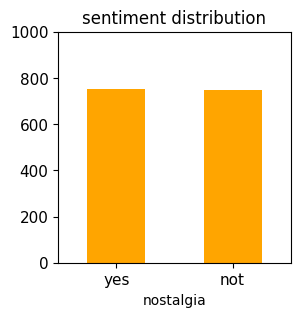

In [494]:
print(X.nostalgia.value_counts())
# plot barchart for X
X.nostalgia.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0, 1000],       
                                    rot =0, fontsize = 11, figsize = (3,3),color=['orange'])

nostalgia
not    503
yes    497
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='nostalgia'>

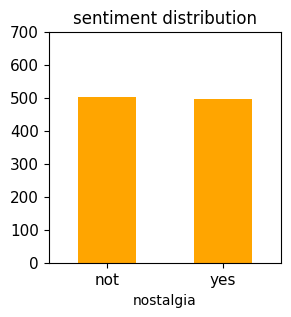

In [495]:
print(X_sample.nostalgia.value_counts())
# plot barchart for X
X_sample.nostalgia.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0, 700],       
                                    rot =0, fontsize = 11, figsize = (3,3),color=['orange'])

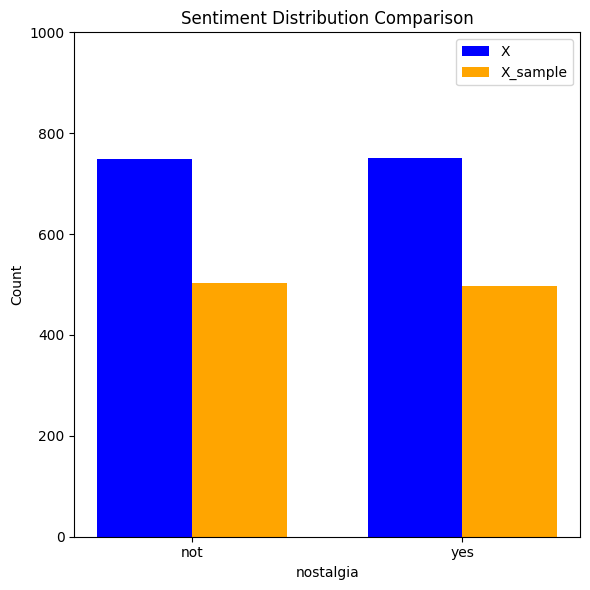

In [496]:
# Get data
X_sample_counts = X_sample.nostalgia.value_counts()
X_counts = X.nostalgia.value_counts()

# Ensure both datasets have the same category index
nostalgia = X_sample_counts.index.union(X_counts.index)  # Merge categories from both datasets

X_sample_counts = X_sample_counts.reindex(nostalgia, fill_value=0)
X_counts = X_counts.reindex(nostalgia, fill_value=0)

# Set bar width and positions
bar_width = 0.35
index = np.arange(len(nostalgia))  # Create x-axis indices

# Create the chart
plt.figure(figsize=(6, 6))
plt.bar(index, X_counts, bar_width, label='X', color='blue')  # First bar
plt.bar(index + bar_width, X_sample_counts, bar_width, label='X_sample', color='orange')  # Second bar, offset in position

# Add labels and title
plt.xlabel('nostalgia')
plt.ylabel('Count')
plt.title('Sentiment Distribution Comparison')
plt.xticks(index + bar_width / 2, nostalgia, rotation=0, fontsize=10)  # Set x-axis tick positions and labels
plt.ylim(0, 1000)  # Set y-axis range
plt.legend()

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


#### 4.1 Feature Creation

In [497]:
from nltk.tokenize import word_tokenize
# Run tokenization
X = pd.DataFrame({'sentiment': df['sentiment'], 'comment': df['comment']})

def custom_tokenize_text(text):
    # Use word_tokenize to split the text into a list of words
    return word_tokenize(text)

# Apply the custom tokenization function to the 'comment' column
X['unigrams'] = X['comment'].apply(custom_tokenize_text)

# Display the first 4 rows of the 'unigrams' column
X[0:4]["unigrams"]
print(X['unigrams'].head(4))


0                                                                                             [He, was, a, singer, with, a, golden, voice, that, I, love, to, hear, all, the, time, ., I, was, his, great, fan, at, the, age, of, 16years, in, those, days, and, still, now, ., Although, we, have, many, singers, now, ,, but, ,, I, can, vouch, for, Jim, Reeves, all, the, time, ., You, feel, relaxed, ,, emotional, and, loving, ., Thank, you, Lord, for, his, life, .]
1                                                                                                                                                                                                                                                                                                                [The, mist, beautiful, voice, ever, I, listened, to, him, when, I, was, a, kid, and, still, love, his, singing, Never, forgotten, The, voice, of, an, angel]
2    [I, have, most, of, Mr., Reeves, songs, ., Always, love, his, smooth, v

In [498]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

#### 4.2 Feature subset selection

In [499]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [500]:
count_vect.get_feature_names_out()[878]

'dad'

In [501]:
analyze = count_vect.build_analyzer()
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [502]:
X_counts.shape

(1500, 3730)

In [503]:
count_vect.get_feature_names_out(df)[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [504]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [505]:
count_vect.get_feature_names_out(df)[0:1]

array(['00'], dtype=object)

In [506]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

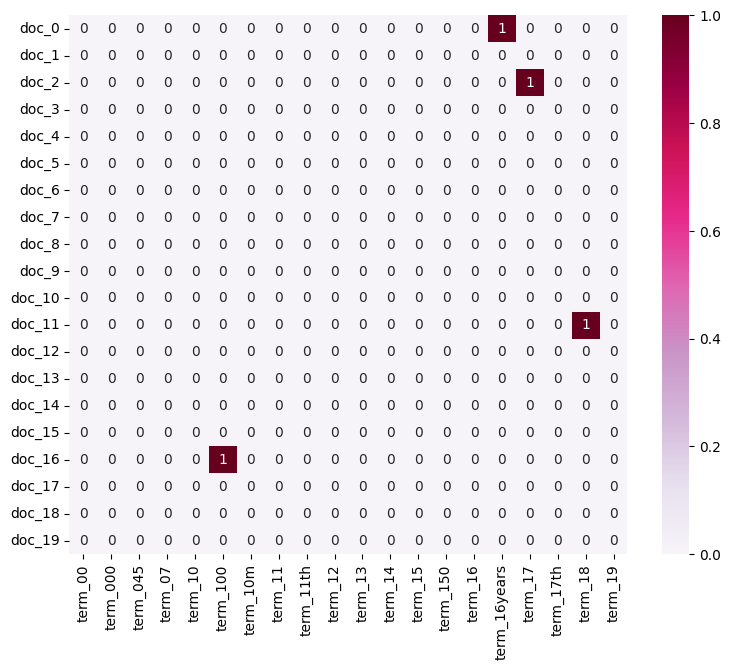

In [507]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### 4.3 Attribute Transformation / Aggregation

In [508]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0]

np.int64(1)

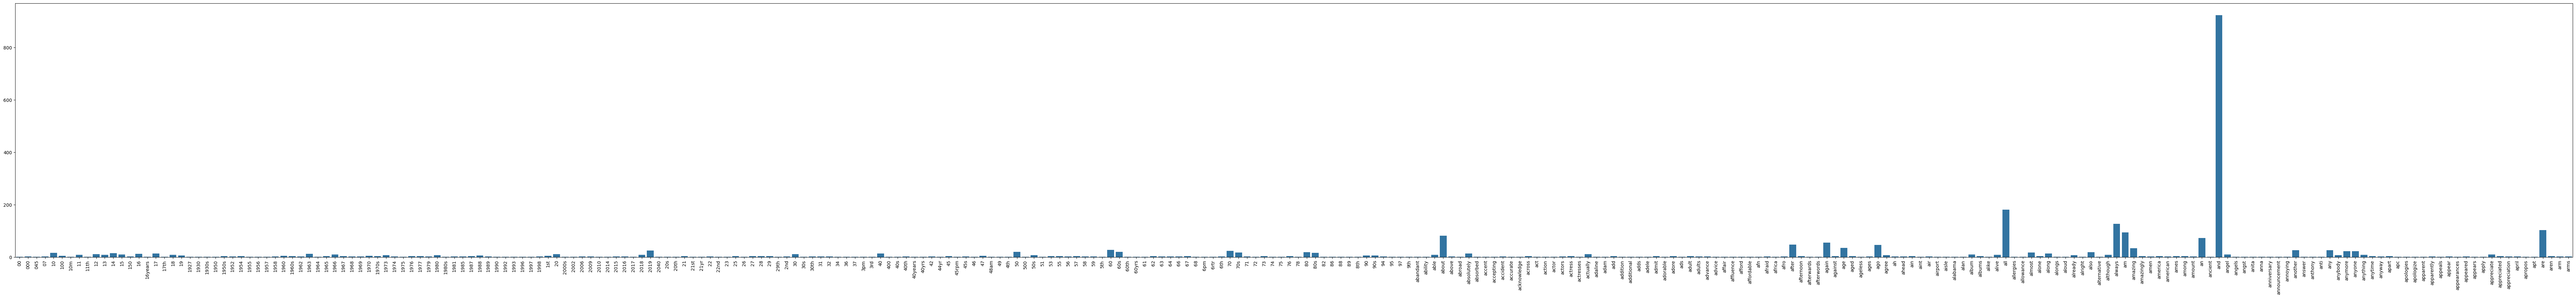

In [509]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Set up the plot with a fixed figure size
plt.subplots(figsize=(100, 10))
g = sns.barplot(
    x=count_vect.get_feature_names_out()[:300], 
    y=term_frequencies[:300]
)

# Set the x-axis ticks and tick labels explicitly to avoid the warning
g.set_xticks(range(300))  # Set a fixed number of ticks matching the labels
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)

# Alternatively, using FixedLocator:
g.xaxis.set_major_locator(ticker.FixedLocator(range(300)))
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)

plt.show()


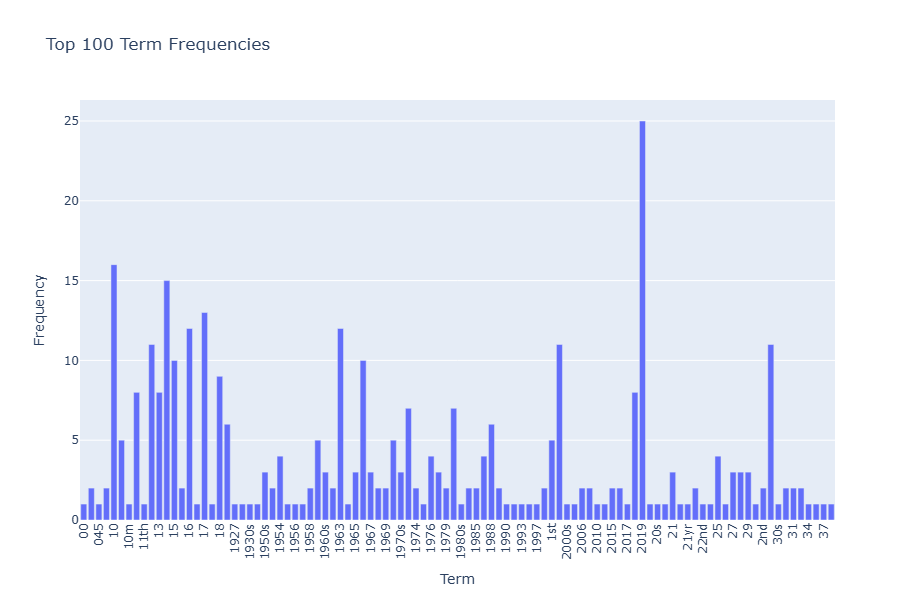

In [510]:
import plotly.express as px
import pandas as pd

# Create a DataFrame to store terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out()[:100],
    'Frequency': term_frequencies[:100]
})

# Create a bar chart using Plotly Express
fig = px.bar(df, x='Term', y='Frequency', title='Top 100 Term Frequencies')

# Set the rotation angle for x-axis labels
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Display the interactive chart
fig.show()


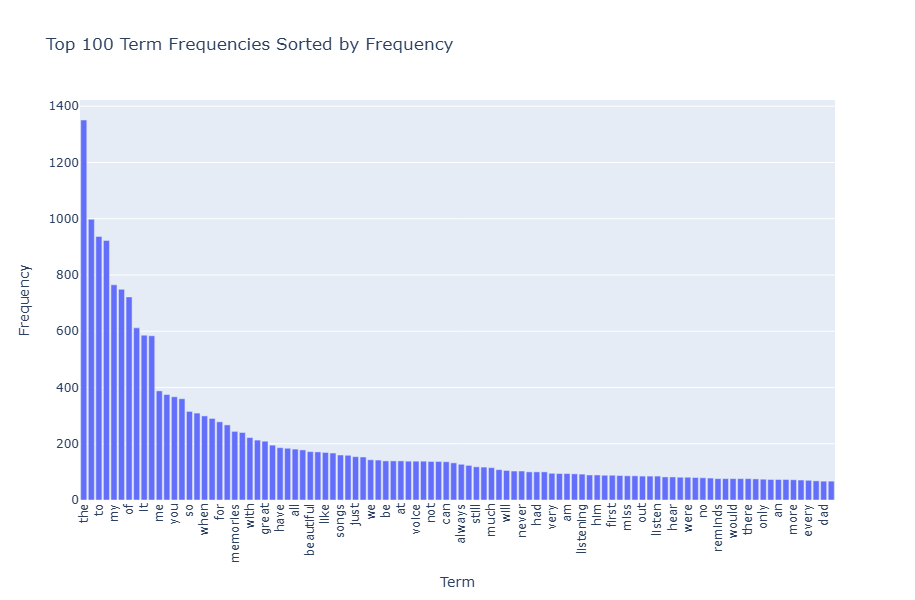

In [511]:
import plotly.express as px
import pandas as pd

# Create a DataFrame containing terms and their frequencies
df = pd.DataFrame({
    'Term': count_vect.get_feature_names_out(),
    'Frequency': term_frequencies
})

# Sort terms by frequency
df_sorted = df.sort_values(by='Frequency', ascending=False)

# Select the top 100 terms for display
df_top = df_sorted.head(100)

# Create a bar chart using Plotly
fig = px.bar(df_top, x='Term', y='Frequency', title='Top 100 Term Frequencies Sorted by Frequency')

# Set the rotation angle for x-axis labels
fig.update_layout(xaxis_tickangle=-90, width=1200, height=600)

# Display the interactive chart
fig.show()


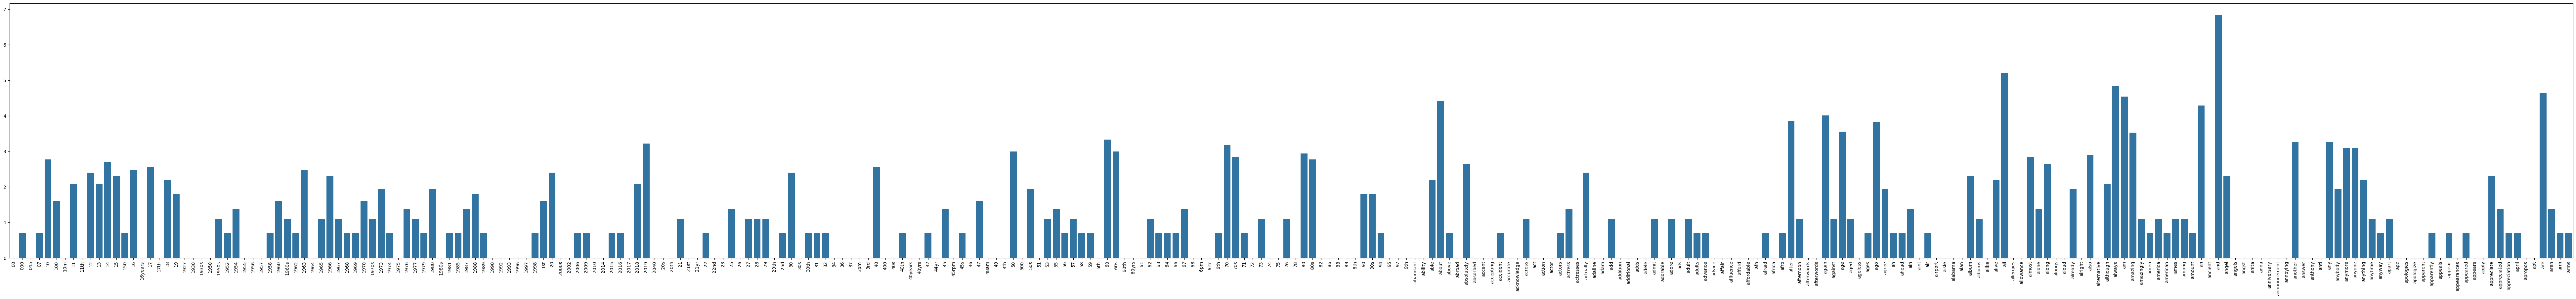

In [512]:
import math
from matplotlib.ticker import FixedLocator

# Calculate the log of term frequencies
term_frequencies_log = [math.log(i) for i in term_frequencies]

# Create the plot with a large figure size for better readability
plt.subplots(figsize=(100, 10))
g = sns.barplot(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies_log[:300]
)

# Set the x-axis ticks to match the labels
g.xaxis.set_major_locator(FixedLocator(range(300)))  # Fix the tick positions to 0 through 299
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)

plt.show()


In [513]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a separate DataFrame for each sentiment
sentiments = X['sentiment'].unique()
sentiment_dfs = {}  # Dictionary to store each sentiment's DataFrame

# Create an individual DataFrame for each sentiment
for sentiment in sentiments:
    # Filter the data based on sentiment
    sentiment_dfs[sentiment] = X[X['sentiment'] == sentiment].copy()

# Function to create a term-document frequency DataFrame
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform text data into a term-frequency matrix
    
    # Retrieve the list of vocabulary terms
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame with terms as columns and documents as rows
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create a term-document frequency DataFrame for each sentiment
term_document_dfs = {}  # Dictionary to store each sentiment's term-document DataFrame

for sentiment, df in sentiment_dfs.items():
    term_document_dfs[sentiment] = create_term_document_df(df)

# Set pandas display options to avoid line breaks in the output
pd.set_option('display.expand_frame_repr', False)  # Display in a single line
pd.set_option('display.max_colwidth', None)  # Set column width

# Example: Display the term-document matrix for a specific sentiment
for sentiment, term_df in term_document_dfs.items():
    print(f"Term-document matrix for sentiment '{sentiment}':")
    print(term_df)
    print("\n")


Term-document matrix for sentiment 'not nostalgia':
     00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  your  yourself  youth  youtube  yrs  yuo  zealand  zulus
0     0    0    0   0    0    0   0   0   0   0  ...         0           0     0         0      0        0    0    0        0      0
1     0    0    0   0    0    0   0   0   0   0  ...         0           0     0         0      0        0    0    0        0      0
2     0    0    0   0    0    0   0   0   0   0  ...         0           0     0         0      0        0    0    0        0      0
3     0    0    0   0    0    0   0   0   0   0  ...         0           0     0         0      0        0    0    0        0      0
4     0    0    0   0    0    0   0   0   0   0  ...         0           0     0         0      0        0    0    0        0      0
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   ...       ...    ...      ...  ...  ...      ...    ...
745   0    0    0

In [514]:
sentiment_number = 1  # Change this value from 0 to any other number to select a different category

# Retrieve all unique sentiment labels
sentiments = list(term_document_dfs.keys())

# Print the term-document matrix for the selected category
print(f"Filtered Term-Document Frequency DataFrame for '{sentiments[sentiment_number]}':")
print(term_document_dfs[sentiments[sentiment_number]])

Filtered Term-Document Frequency DataFrame for 'nostalgia':
     07  10  11  11th  12  13  14  15  16  17  ...  young  younger  youngster  your  yours  youth  youthful  youtube  yrs  yup
0     0   0   0     0   0   0   0   0   0   0  ...      0        0          0     0      0      0         0        0    0    0
1     0   0   0     0   0   0   0   0   0   1  ...      0        0          0     0      0      0         0        0    0    0
2     0   0   0     0   0   0   0   0   0   0  ...      0        0          0     0      0      0         0        0    0    0
3     0   0   0     0   0   0   0   0   0   0  ...      0        0          0     1      0      0         0        0    0    0
4     0   0   0     0   0   0   0   0   0   0  ...      0        0          0     0      0      0         0        0    0    0
..   ..  ..  ..   ...  ..  ..  ..  ..  ..  ..  ...    ...      ...        ...   ...    ...    ...       ...      ...  ...  ...
745   0   0   0     0   0   0   0   0   0   0  ... 

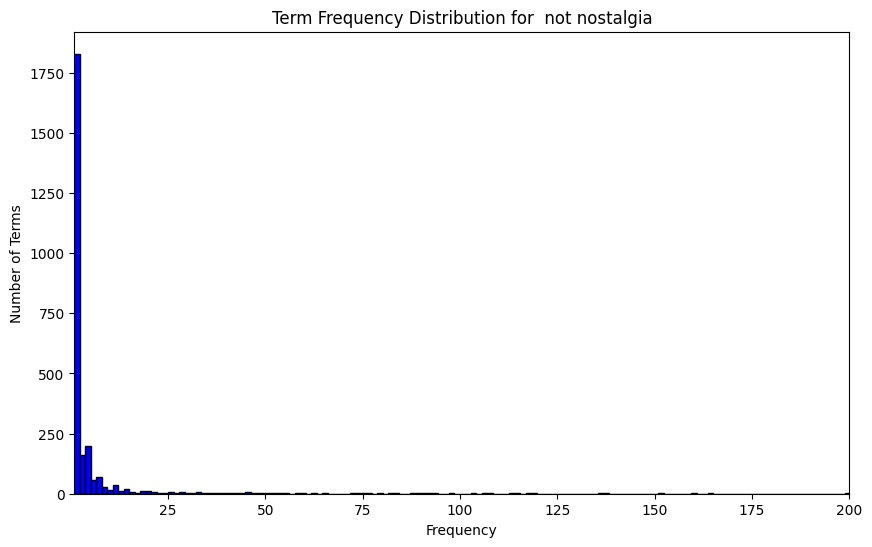

In [515]:
sentiment_number=0 #You can change it from 0 to 1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=500, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for  {sentiments[sentiment_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [516]:
sentiment_number=0 #You can change it from 0 to 1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in top_5_percent_indices]

print(f"sentiment: {sentiments[sentiment_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

sentiment: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['16', '15', '1963', '1960s', '1960', '1958', '1955', '1954', '1952', '11', '100', 'quando', 'purchased', 'melodrama', 'melodic', 'melbourne', 'lisa', 'liking', '1970', 'proof', 'pronunciation', 'promise', 'profane', 'prof', 'produced', 'prodigy', '1967', '1966', '1964', '045', 'putting', '17th', '20s', '2018', '2017', '2014', '2009', '2002', '2000s', '20', '1st', '1998', '1996', '1993', '1992', '1990', '1985', '1979', '25', '23', '22nd', 'likes', 'light', 'lifts', 'lift', 'lifetime', 'lies', 'license', 'library', 'levi', 'level', 'lets', 'lest', '20th', 'prime', 'prevalent', 'pretty', 'pretensions', '400', '40', '3pm', '34', '32', '31', '30th', '30s', '30', '2nd', '29th', '28', '50', '4th', '49', '47', '45s', '45rpm', '45', '42', '40yrs', '40years', '40th', 'probably', 'privilege', 'priscilla', 'principle', 'princess', 'prefer', 'predictions', 'predicting', '74', '71', '70s', '6pm', '66', '64', '62', '61', '60th',

In [517]:
sentimen_number=0 #You can change it from 0 to 1
word_counts = term_document_dfs[sentiments[sentiment_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [count_vect.get_feature_names_out()[i] for i in bottom_1_percent_indices]

print(f"sentimen: {sentiments[sentiment_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")


sentimen: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['16', '15', '1963', '1960s', '1960', '1958', '1955', '1954', '1952', '11', '100', 'quando', 'purchased', 'melodrama', 'melodic', 'melbourne', 'lisa', 'liking', '1970', 'proof', 'pronunciation', 'promise', 'profane', 'prof', 'produced', 'prodigy']


In [518]:
sentiment_number=0#You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
filtered_term_document_dfs = {}

for sentiment in sentiments:
    filtered_term_document_dfs[sentiment] = filter_top_bottom_words_by_sum(term_document_dfs[sentiment])
term_document_dfs=filtered_term_document_dfs
# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for {sentiments[sentiment_number]}:")
filtered_term_document_dfs[sentiments[sentiment_number]]

Filtered Term-Document Frequency DataFrame for not nostalgia:


,00,000,045,10,100,11,14,15,150,16,...,yet,young,younger,youngest,yourself,youth,youtube,yrs,yuo,zealand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
748,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [524]:
from PAMI.extras.convert._DF2DB import _DenseFormatDF as db  # Import the DF2DB class from the specified module for DataFrame-to-database conversion

# Loop through the dictionary of term-document DataFrames
for sentiment in term_document_dfs:
    # Replace dots with underscores in the sentiment name to avoid errors in the file creation
    sentiment_safe = sentiment.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[sentiment])
    obj.convert2TransactionalDatabase(f'td_freq_db_{sentiment_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


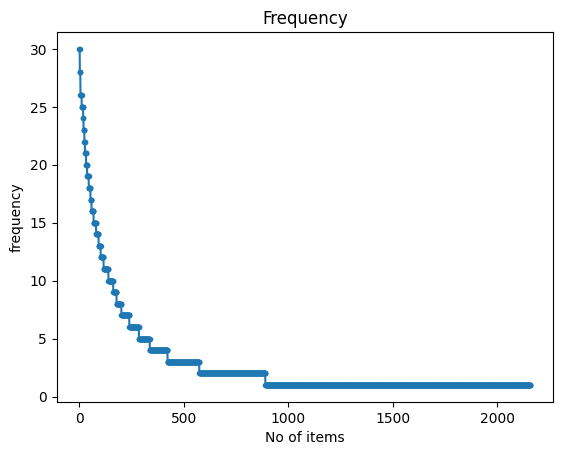

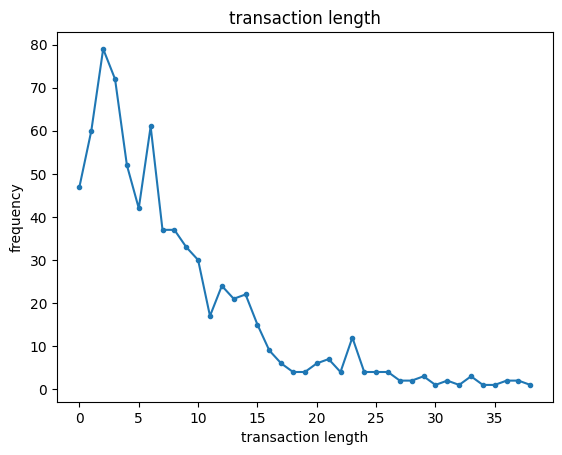

In [525]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 747
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.392235609103079
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.938560371491883
Variance in Transaction Sizes : 35.31377341358284
Sparsity : 0.9965689960715033


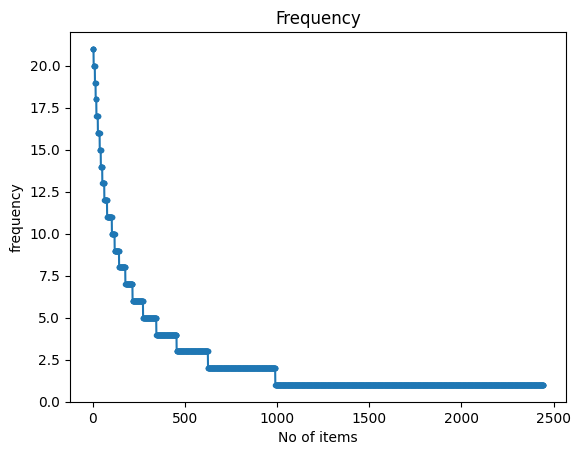

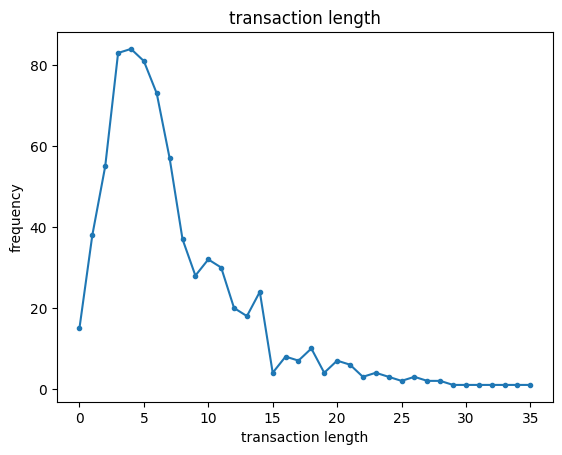

In [521]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [526]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 180
Runtime: 0.012006998062133789


In [527]:
obj1.save('td_freq_db_nostalgia.csv') #save the patterns
frequentPatternsDF_sci_med

,Patterns,Support
0,find,9
1,down,9
2,few,9
3,its,9
4,sure,9
...,...,...
175,ever,28
176,would,28
177,go,28
178,takes,30


In [528]:
from PAMI.frequentPattern.basic import FPGrowth as alg
minSup=9
obj1 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_sci_med= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_sci_med))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 144
Runtime: 0.012162208557128906


In [529]:
obj1.save('td_freq_db_not nostalgia.csv') #save the patterns
frequentPatternsDF_sci_med

,Patterns,Support
0,favorites,9
1,special,9
2,soul,9
3,mind,9
4,60,9
...,...,...
139,every,21
140,loved,21
141,classic,21
142,them,21


#### 4.4 Discretization and Binarization


In [532]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)

LabelBinarizer()

In [533]:
from sklearn.preprocessing import MultiLabelBinarizer
X['bin_sentiment'] = mlb.fit_transform(X['sentiment']).tolist()
#X['sentiment_transformed'] = mlb.fit_transform(X['sentiment'].apply(lambda x: [x] if isinstance(x, str) else x)).tolist()
#X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist() 
X[0:5]

,sentiment,comment,unigrams,bin_sentiment
0,not nostalgia,"He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.","[He, was, a, singer, with, a, golden, voice, that, I, love, to, hear, all, the, time, ., I, was, his, great, fan, at, the, age, of, 16years, in, those, days, and, still, now, ., Although, we, have, many, singers, now, ,, but, ,, I, can, vouch, for, Jim, Reeves, all, the, time, ., You, feel, relaxed, ,, emotional, and, loving, ., Thank, you, Lord, for, his, life, .]",[1]
1,nostalgia,The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel,"[The, mist, beautiful, voice, ever, I, listened, to, him, when, I, was, a, kid, and, still, love, his, singing, Never, forgotten, The, voice, of, an, angel]",[0]
2,nostalgia,"I have most of Mr. Reeves songs. Always love his smooth voice, so comforting and sounds like the people I grew up around. They were so gentle and sweet, but I had to leave my little town to find a job at age 17. I graduated early. I never forgot how great it was to grow up with simple people who had no pretensions -- just loving and gentle, like I think Jesus is.","[I, have, most, of, Mr., Reeves, songs, ., Always, love, his, smooth, voice, ,, so, comforting, and, sounds, like, the, people, I, grew, up, around, ., They, were, so, gentle, and, sweet, ,, but, I, had, to, leave, my, little, town, to, find, a, job, at, age, 17, ., I, graduated, early, ., I, never, forgot, how, great, it, was, to, grow, up, with, simple, people, who, had, no, pretensions, --, just, loving, and, gentle, ,, like, I, think, Jesus, is, .]",[0]
3,not nostalgia,"30 day leave from 1st tour in Viet Nam to convince my Mary Lou to ""marry me"" when I came back from my 2nd tour. Now, 47 years later this December God granted the greatest blessing a man can receive. This song is for the hope of life all who have served pray for and some are granted that hope to be reality. Thank you my Mary Lou.","[30, day, leave, from, 1st, tour, in, Viet, Nam, to, convince, my, Mary, Lou, to, ``, marry, me, '', when, I, came, back, from, my, 2nd, tour, ., Now, ,, 47, years, later, this, December, God, granted, the, greatest, blessing, a, man, can, receive, ., This, song, is, for, the, hope, of, life, all, who, have, served, pray, for, and, some, are, granted, that, hope, to, be, reality, ., Thank, you, my, Mary, Lou, .]",[1]
4,nostalgia,listening to his songs reminds me of my mum who played him everyday,"[listening, to, his, songs, reminds, me, of, my, mum, who, played, him, everyday]",[0]


### 5. Data Exploration

In [534]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [535]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['My grandma really loved elvis ???s music .. so we played this song at her funeral .. everytime i listen to this Song there are so many memories in my head']
["My grandad listens this on a CD with me and I learned the words but sadly he passed away and we will miss and love him I lost him when I'm 11 I will always miss him:("]


In [536]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [537]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity Cos=the angle between the two vectors
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)[0, 0]
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)[0, 0]
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)[0, 0]

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)[0, 0]
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)[0, 0]
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)[0, 0]

# Print results
print("Cosine Similarity using count between 1 and 2: %(x)f" % {"x": cos_sim_count_1_2})
print("Cosine Similarity using count between 1 and 3: %(x)f" % {"x": cos_sim_count_1_3})
print("Cosine Similarity using count between 2 and 3: %(x)f" % {"x": cos_sim_count_2_3})

print("Cosine Similarity using count between 1 and 1: %(x)f" % {"x": cos_sim_count_1_1})
print("Cosine Similarity using count between 2 and 2: %(x)f" % {"x": cos_sim_count_2_2})
print("Cosine Similarity using count between 3 and 3: %(x)f" % {"x": cos_sim_count_3_3})


Cosine Similarity using count between 1 and 2: 0.124611
Cosine Similarity using count between 1 and 3: 0.170251
Cosine Similarity using count between 2 and 3: 0.121988
Cosine Similarity using count between 1 and 1: 1.000000
Cosine Similarity using count between 2 and 2: 1.000000
Cosine Similarity using count between 3 and 3: 1.000000


As expected, cosine similarity between a sentence and itself is 1. Between 2 entirely different sentences, it will be 0.

We can assume that we have the more common features in the documents 1 and 3 than in documents 1 and 2. 

This reflects indeed in a higher similarity than that of sentences 1 and 3.

### 6. Data Classification

In [538]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Ensure 'sentiment' is a string, not a list, by joining elements if it's a list
X['sentiment'] = X['sentiment'].apply(lambda x: ', '.join(map(str, x)) if isinstance(x, list) else x)

# Create a mapping between sentiment and comment
sentiment_mapping = dict(X[['sentiment', 'comment']].drop_duplicates().values)
from sklearn.feature_extraction.text import CountVectorizer

# Ensure `X['comment']` has the same length as `X['sentiment']`
vectorizer = CountVectorizer()
tdm_df = vectorizer.fit_transform(X['comment'])

# Check if the lengths match
if tdm_df.shape[0] == len(X['sentiment']):
    X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)
else:
    print("Data length still mismatched.")

# Convert numeric labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]

# Verify if `tdm_df` rows match the length of `X['sentiment']`
if tdm_df.shape[0] == len(X['sentiment']):
    X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)
else:
    print("Data length still mismatched.")

# Convert numeric labels to text labels
target_names = [sentiment_mapping[label] for label in sorted(sentiment_mapping.keys())]


In [539]:
X_train

<1050x3730 sparse matrix of type '<class 'numpy.int64'>'
	with 22041 stored elements in Compressed Sparse Row format>

In [540]:
X_test

<450x3730 sparse matrix of type '<class 'numpy.int64'>'
	with 9219 stored elements in Compressed Sparse Row format>

In [541]:
# Assume `sentiment_mapping` is a mapping from sentiment IDs to names, e.g., {0: 'positive', 1: 'negative', 2: 'neutral'}
sentiment_mapping = {0: 'not nostalgia', 1: 'nostalgia'}  # Adjust according to your actual mapping

# Define target_names as the list of sentiment names from the mapping
target_names = list(sentiment_mapping.values())

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['sentiment'], test_size=0.3, random_state=42)


Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.7917    0.9289    0.8548       225
    nostalgia     0.9140    0.7556    0.8273       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450



In [542]:
# Use CountVectorizer to convert text into a document-term frequency matrix
vectorizer = CountVectorizer()
augmented_df = vectorizer.fit_transform(X['comment'])

# Check if the dimensions of the transformed matrix match
if augmented_df.shape[0] == len(X['sentiment']):
    # Data lengths match; proceed with data splitting
    X_train, X_test, y_train, y_test = train_test_split(augmented_df, X['sentiment'], test_size=0.3, random_state=42)
else:
    print("Data length mismatch: augmented_df and X['sentiment'] have different lengths.")


In [543]:
X_train

<1050x3730 sparse matrix of type '<class 'numpy.int64'>'
	with 22041 stored elements in Compressed Sparse Row format>

In [544]:
X_test

<450x3730 sparse matrix of type '<class 'numpy.int64'>'
	with 9219 stored elements in Compressed Sparse Row format>

In [545]:
# Assume `sentiment_mapping` is a mapping from sentiment IDs to names, e.g., {0: 'positive', 1: 'negative', 2: 'neutral'}
sentiment_mapping = {0: 'not nostalgia', 1: 'nostalgia'} 

# Define target_names as a list of sentiment names from the mapping
target_names = list(sentiment_mapping.values())

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy: 0.8422222222222222

Classification Report:
                precision    recall  f1-score   support

not nostalgia     0.7917    0.9289    0.8548       225
    nostalgia     0.9140    0.7556    0.8273       225

     accuracy                         0.8422       450
    macro avg     0.8528    0.8422    0.8410       450
 weighted avg     0.8528    0.8422    0.8410       450

